<a href="https://colab.research.google.com/github/Jeongwoo-KGI/sides-and-school/blob/main/NLP_Markov_Models_JWP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are three languages: A, B, and C. Each language uses the same set of symbols: “A, o, e, t, p, g, and k. However, each language uses the symbols differently. In each of these languages we can model everything as P(next symbol | current symbol). There is training data available for each language. This consists of several files each generated by sampling from a Markov model. Using python, build a Markov model for each of the languages. Now use the Markov model and Bayes’ rule to classify the test cases. Write down how you used Bayes’ rule to get your classifier. Give the full posterior distribution for each test case.

For pre-class work you are asked to do two things:
1. build a Markov model for each language:
- find the initial distribution (With what probability does each letter occur first?)
- find the transition matrix (Look here if you’re stuck.)
- Now you have a Markov model :)
2. classify test cases for each language using Bayes’ rule → find the probability of a language, given the string: P(language = A|string = “Aoetpp”)
Bayes rule: P(A|B) = $\frac{P(B|A)*P(A)}{P(B)}$
- P(language = A|string = “Aoetpp”) is the posterior we are interested in.
- P(string = “Aoetpp”|language = A) is the likelihood, the probability of a string given a certain language
- calculate the probability of the markov model for language A generating the string “Aoetpp”
- What is the probability of “A”? (initial distribution)
- What is the probability of “o” given “A”? (transition matrix)
- P(language = A) is the prior probability we have about the probability of the language. (You can assume a uniform prior.)
- P(string = “Aoetpp”) is the evidence, or the probability of the string “Aoetpp”.
- P(string = “Aoetpp”|language = A) * P(language = A)
- P(string = “Aoetpp”|language = B) * P(language = B)
- P(string = “Aoetpp”|language = C) * P(language = C)
- Identify which language model has the highest probability … tadaaaam!

### Code function testing


In [ ]:
transitions = ['A', 'B', 'B', 'C', 'B', 'A', 'D', 'D', 'A', 'B', 'A', 'D']

def rank(c):
    return ord(c) - ord('A')

T = [rank(c) for c in transitions]

#create matrix of zeros

M = [[0]*4 for _ in range(4)]

for (i,j) in zip(T,T[1:]):
  print(i, j)
  M[i][j] += 1

#now convert to probabilities:
for row in M:
    n = sum(row)
    if n > 0:
        row[:] = [f/sum(row) for f in row]

#print M:

for row in M:
    print(row)

0 1
1 1
1 2
2 1
1 0
0 3
3 3
3 0
0 1
1 0
0 3
[0.0, 0.5, 0.0, 0.5]
[0.5, 0.25, 0.25, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.5]


In [1]:
#load the files into an array
import zipfile
from google.colab import drive
import io


drive.mount('/content/drive/')

!unzip /content/drive/My\ Drive/symbol.zip > /dev/null

!unzip /content/drive/My\ Drive/audio.zip > /dev/null

#check whether the file is successfully unzipped
!ls
#successful!


Mounted at /content/drive/
audio  drive  __MACOSX	sample_data  symbol


In [15]:
from glob import glob

#now load the data
symbols = glob('symbol/*') #includes transitions from symbol A e o t p k g
audios = glob('audio/*') #includes transitions from pronounciation of A e o t p k g

In [ ]:
print(symbols)

['symbol/language-training-langA-19', 'symbol/language-test-7', 'symbol/language-training-langB-24', 'symbol/language-training-langB-8', 'symbol/language-training-langA-10', 'symbol/language-training-langC-26', 'symbol/language-training-langB-10', 'symbol/language-training-langB-17', 'symbol/language-training-langB-1', 'symbol/language-training-langA-18', 'symbol/language-training-langC-15', 'symbol/language-training-langA-17', 'symbol/language-test-3', 'symbol/language-training-langA-24', 'symbol/language-test-5', 'symbol/language-training-langC-12', 'symbol/language-training-langB-12', 'symbol/language-training-langA-20', 'symbol/language-training-langC-5', 'symbol/language-training-langC-7', 'symbol/language-training-langB-2', 'symbol/language-training-langA-12', 'symbol/language-training-langA-29', 'symbol/language-training-langC-27', 'symbol/language-training-langC-1', 'symbol/language-training-langC-11', 'symbol/language-test-2', 'symbol/language-training-langA-3', 'symbol/langua

- Bayes theorem starts with a prior. And by having no assumptions or previous knowledge about the languages here, I am assuming uniform distribution for all the probabilities.
- As the code progresses, we can keep updating the transition matrix. 

In [ ]:
#Build a Markov Matrix for symbols with Uniform distribution
#there are 3 languages A, B, and C
# letters : A e o t p k g
langA = []
langB = []
langC = []
test = []

for i in symbols:
  if 'symbol/language-training-langA' in i:
    langA.append(i)
  elif 'symbol/language-training-langB' in i:
    langB.append(i)
  elif 'symbol/language-training-langC' in i:
    langC.append(i)
  else:
    test.append(i)

def transitions(language):
  test = ''
  for i in language:
    text = test + open(i).read()
  return text

#langA = transitions(langA)
#langB = transitions(langB)
#langC = transitions(langC)
#test = transitions(test)

def rank(c):
  if c == 'A':
    return 0
  elif c == 'e':
    return 1
  elif c == 'o':
    return 2
  elif c == 't':
    return 3
  elif c == 'p':
    return 4
  elif c == 'k':
    return 5
  else: #c==g
    return 6
  #return ord(c) - ord('A')

T_A = [rank(c) for c in open(langA[0]).read()]
T_B = [rank(c) for c in open(langB[0]).read()]
T_C = [rank(c) for c in open(langC[0]).read()]

#create matrix of uniform distribution
M_A= [[float(1/7)]*7 for _ in range(7)] #there are 7 states
#all uniform dist for language B and C as well
M_B= [[float(1/7)]*7 for _ in range(7)]
M_C = [[float(1/7)]*7 for _ in range(7)]
print(len(T_A), len(T_B), len(T_C))
print(M_A)

100 100 100
[[0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285], [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285], [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285], [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285], [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285], [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285], [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.142857

In [ ]:
print(langA)
#M = [[0]*4 for _ in range(4)]
#print(M)

['symbol/language-training-langA-19', 'symbol/language-training-langA-10', 'symbol/language-training-langA-18', 'symbol/language-training-langA-17', 'symbol/language-training-langA-24', 'symbol/language-training-langA-20', 'symbol/language-training-langA-12', 'symbol/language-training-langA-29', 'symbol/language-training-langA-3', 'symbol/language-training-langA-16', 'symbol/language-training-langA-6', 'symbol/language-training-langA-0', 'symbol/language-training-langA-5', 'symbol/language-training-langA-27', 'symbol/language-training-langA-23', 'symbol/language-training-langA-1', 'symbol/language-training-langA-11', 'symbol/language-training-langA-14', 'symbol/language-training-langA-2', 'symbol/language-training-langA-26', 'symbol/language-training-langA-9', 'symbol/language-training-langA-13', 'symbol/language-training-langA-21', 'symbol/language-training-langA-7', 'symbol/language-training-langA-8', 'symbol/language-training-langA-28', 'symbol/language-training-langA-25', 'symbol/l

In [ ]:
k = open(langA[1]).read()
print(k[1])
print(k)

t
otkAkegApekopApegetggotpetkokekAgAeAtpettgepepogetkotpApepokAegtgegekogepegepgokokoggokoptkkkegotkot


In [ ]:
def update(T, M):
  print("Transition Matrix")
  for (i,j) in zip(T,T[1:]):
    M[i][j] += 1
  #now convert to probabilities:
  for row in M:
    n = sum(row)
    if n > 0:
      row[:] = [f/sum(row) for f in row]

  #print M:
  for row in M:
    print(row)
  print("---")
  return M
#print(zip(T_A, T_A[1:]))
#sequence of 'A e o t k p g' for both rows and coloumns
transition_matrix_A = update(T_A, M_A) #print the transition matrix of A
transition_matrix_B = update(T_B, M_B)
transition_matrix_C = update(T_C, M_C)

Transition Matrix
[0.0761904761904762, 0.009523809523809525, 0.14285714285714288, 0.2761904761904762, 0.20952380952380956, 0.0761904761904762, 0.20952380952380956]
[0.13392857142857145, 0.00892857142857143, 0.00892857142857143, 0.19642857142857145, 0.32142857142857145, 0.19642857142857145, 0.13392857142857145]
[0.010204081632653062, 0.010204081632653062, 0.010204081632653062, 0.29591836734693877, 0.22448979591836737, 0.29591836734693877, 0.15306122448979592]
[0.00892857142857143, 0.00892857142857143, 0.07142857142857144, 0.13392857142857145, 0.19642857142857145, 0.38392857142857145, 0.19642857142857145]
[0.11904761904761907, 0.45238095238095244, 0.28571428571428575, 0.007936507936507938, 0.11904761904761907, 0.007936507936507938, 0.007936507936507938]
[0.4464285714285715, 0.19642857142857148, 0.13392857142857145, 0.13392857142857145, 0.00892857142857143, 0.07142857142857144, 0.00892857142857143]
[0.19480519480519487, 0.3766233766233767, 0.2857142857142858, 0.012987012987012991, 0.10389

- What is the probability of “o” given “A”? (transition matrix) : language B has the highest probability in terms of the matrix above(0.297)

- What is the probability of “A”? (initial distribution)

In [ ]:
print(transition_matrix_A)
def prob(TM, symbol): #finding probability of certain symbol given that language
  prob = 0
  symbol = rank(symbol)
  for i in TM:
    prob += i[symbol]
    #print(prob)
  #print(prob/7)
  return prob/7 #as all numbers in matrix adds up to 7

print(prob(transition_matrix_A, 'A'))
prob_BA = prob(transition_matrix_B, 'A')
print(prob_BA)
prob(transition_matrix_C, 'A')


[[0.0761904761904762, 0.009523809523809525, 0.14285714285714288, 0.2761904761904762, 0.20952380952380956, 0.0761904761904762, 0.20952380952380956], [0.13392857142857145, 0.00892857142857143, 0.00892857142857143, 0.19642857142857145, 0.32142857142857145, 0.19642857142857145, 0.13392857142857145], [0.010204081632653062, 0.010204081632653062, 0.010204081632653062, 0.29591836734693877, 0.22448979591836737, 0.29591836734693877, 0.15306122448979592], [0.00892857142857143, 0.00892857142857143, 0.07142857142857144, 0.13392857142857145, 0.19642857142857145, 0.38392857142857145, 0.19642857142857145], [0.11904761904761907, 0.45238095238095244, 0.28571428571428575, 0.007936507936507938, 0.11904761904761907, 0.007936507936507938, 0.007936507936507938], [0.4464285714285715, 0.19642857142857148, 0.13392857142857145, 0.13392857142857145, 0.00892857142857143, 0.07142857142857144, 0.00892857142857143], [0.19480519480519487, 0.3766233766233767, 0.2857142857142858, 0.012987012987012991, 0.1038961038961039

0.07476042364997948

2. classify test cases for each language using Bayes’ rule → find the probability of a language, given the string: P(language = A|string = “Aoetpp”)
Bayes rule: P(A|B) = $\frac{P(B|A)*P(A)}{P(B)}$
- P(language = A|string = “Aoetpp”) is the posterior we are interested in.
- P(string = “Aoetpp”|language = A) is the likelihood, the probability of a string given a certain language
- calculate the probability of the markov model for language A generating the string “Aoetpp”
- P(language = A) is the prior probability we have about the probability of the language. (You can assume a uniform prior.)
- P(string = “Aoetpp”) is the evidence, or the probability of the string “Aoetpp”.
- P(string = “Aoetpp”|language = A) * P(language = A)
- P(string = “Aoetpp”|language = B) * P(language = B)
- P(string = “Aoetpp”|language = C) * P(language = C)
- Identify which language model has the highest probability … tadaaaam!

probability of having a specific language (P(language = A), P(language = B), P(language = C) are the same)

In [ ]:
print(test)
#the testing data seems to not have specific language assigned

['symbol/language-test-7', 'symbol/language-test-3', 'symbol/language-test-5', 'symbol/language-test-2', 'symbol/language-test-0', 'symbol/language-test-4', 'symbol/language-test-6', 'symbol/language-test-9', 'symbol/language-test-8', 'symbol/language-test-1']


In [ ]:
#probability of having a specific language (P(language = A), P(language = B), P(language = C) are the same)
P_lang = float(1/3) #prior

#likelihood of having Aoetpp given the language
def likelihood(Matrix, String):
  index = []
  for i in String:
    index.append(rank(i))
  likelihoods = prob(Matrix, String[0]) #probability of having the initial symbol 

  for i in range(len(index)-1):
    likelihoods *= Matrix[index[i]][index[i+1]]
  return likelihoods

likely_A = likelihood(transition_matrix_A, 'Aoetpp')
likely_B = likelihood(transition_matrix_B, 'Aoetpp')
likely_C = likelihood(transition_matrix_C, 'Aoetpp')
print(likely_A, likely_B, likely_C)
print(max(likely_A, likely_B, likely_C)) #seems like language B has the highest likelihood of having Aoetpp
#as P_lang is uniform, the posterior will still be the biggest at language B
posterior = [likely_A*P_lang, likely_B*P_lang, likely_C*P_lang]
if posterior.index(max(posterior)) == 0:
  print('Language A has highest probability')
elif posterior.index(max(posterior)) == 1:
  print('language B has highest probability')
else:
  print('language C has highest probability')

9.465383059568334e-07 3.7794514398600596e-06 1.9307642077309522e-07
3.7794514398600596e-06
language B has highest probability


## 2. Speaker Identification


In [4]:
pip install hmmlearn

     |████████████████████████████████| 129 kB 5.1 MB/s 


In [5]:
from time import sleep
#from tqdm.notebook import tqdm
import numpy as np
#import os
from glob import glob
import matplotlib.pyplot as plt
from hmmlearn.hmm import MultinomialHMM
import io
import pandas as pd

In [6]:
#there are 3 languages A, B, and C
# letters : A e o t p k g
langA = []
langB = []
langC = []
test = []

for i in symbols:
  if 'symbol/language-training-langA' in i:
    langA.append(i)
  elif 'symbol/language-training-langB' in i:
    langB.append(i)
  elif 'symbol/language-training-langC' in i:
    langC.append(i)
  else:
    test.append(i)

print(type(langA[1]))
print(langA[1])

def open_file(files, lists, array_sentence):

  for file in files:
    temp = open(file)
    for line in temp:
      array_sentence.append(line)
      for char in line:
        lists.append(char)

  return lists, array_sentence

A_lists = []
B_lists = []
C_lists = []
test_lists = []

A_array_sentence = []
B_array_sentence = []
C_array_sentence = []
test_array_sentence = []

A_lists, A_array_sentence = open_file(langA, A_lists, A_array_sentence)
B_lists, B_array_sentence = open_file(langB, B_lists, B_array_sentence)
C_lists, C_array_sentence = open_file(langC, C_lists, C_array_sentence)
test_lists, test_array_sentence = open_file(test, test_lists, test_array_sentence)

num_of_files = len(A_array_sentence) + len(B_array_sentence) + len(C_array_sentence)
print(num_of_files)

<class 'str'>
symbol/language-training-langA-12
90


Initial Probability Distribution
- Let's see how the actual data is shaped like 
- And consider this as the average shape of the language probability distribution as we have so many data. 

In [7]:
dist_A = {}
dist_B = {}
dist_C = {}

def distributions(lists, dist):
  for speech in lists:
    dist[speech[0]] = dist.get(speech[0], 0) + 1
  dist = {k: dist[k]/np.sum([*dist.values()]) for k in sorted(dist.keys())}
  return dist 

dist_A = distributions(A_lists, dist_A)
dist_B = distributions(B_lists, dist_B)
dist_C = distributions(C_lists, dist_C)

print(dist_A, '\n', dist_B,'\n', dist_C)

{'A': 0.13433333333333333, 'e': 0.13933333333333334, 'g': 0.14833333333333334, 'k': 0.13633333333333333, 'o': 0.13966666666666666, 'p': 0.14866666666666667, 't': 0.15333333333333332} 
 {'A': 0.224, 'e': 0.23866666666666667, 'g': 0.15233333333333332, 'k': 0.014666666666666666, 'o': 0.17666666666666667, 'p': 0.017666666666666667, 't': 0.176} 
 {'A': 0.14266666666666666, 'e': 0.14366666666666666, 'g': 0.146, 'k': 0.12366666666666666, 'o': 0.14533333333333334, 'p': 0.151, 't': 0.14766666666666667}


Transition matrix(Probability Distribution)
- Consider the likelihood as normal distribution

In [8]:
def transition_matrix(lists):
  transitions = lists
  df = pd.DataFrame(transitions)
  #create a new column with data shifted by one
  df['shift'] = df[0].shift(-1)
  #add a count column for group by function
  df['count'] = 1
  #groupby, then unstack, fill the zeros
  trans_mat = df.groupby([0, 'shift']).count().unstack().fillna(0)
  #normalize by occurences and save values to get transition matrix
  trans_mat_ = trans_mat.div(trans_mat.sum(axis=1), axis=0).values
  return trans_mat_

transition_matrix_A = transition_matrix(A_lists)
transition_matrix_B = transition_matrix(B_lists)
transition_matrix_C = transition_matrix(C_lists)

print('Transition matrix for A:', '\n\n', transition_matrix_A, '\n\n',
'Transition matrix for B:', '\n\n', transition_matrix_B, '\n\n',
'Transition matrix for C:', '\n\n', transition_matrix_C, '\n')

Transition matrix for A: 

 [[0.01985112 0.03225806 0.22828784 0.2133995  0.01985112 0.22332506
  0.2630273 ]
 [0.02631579 0.01674641 0.23923445 0.20574163 0.03110048 0.26076555
  0.22009569]
 [0.26292135 0.27640449 0.03146067 0.02696629 0.32808989 0.0494382
  0.0247191 ]
 [0.31784841 0.28361858 0.03667482 0.04156479 0.24694377 0.02933985
  0.04400978]
 [0.01670644 0.02625298 0.24343675 0.21479714 0.02147971 0.23150358
  0.24582339]
 [0.26966292 0.30337079 0.03820225 0.02022472 0.29213483 0.02696629
  0.0494382 ]
 [0.02173913 0.02826087 0.22826087 0.23478261 0.02608696 0.22608696
  0.23478261]] 

 Transition matrix for B: 

 [[0.02678571 0.04166667 0.28125    0.03571429 0.28571429 0.0297619
  0.29910714]
 [0.01955307 0.03212291 0.2527933  0.02234637 0.31284916 0.0377095
  0.3226257 ]
 [0.45295405 0.404814   0.03938731 0.00218818 0.05032823 0.
  0.05032823]
 [0.04545455 0.02272727 0.27272727 0.02272727 0.25       0.09090909
  0.29545455]
 [0.41398866 0.43289225 0.0415879  0.         0.0

Markov model and Bayes' rule to classify the test cases

In [23]:
letters = ['A','o','e','t','p','g','k']
sym = {letters[i]: i for i in range(len(letters))}

def pipe(symbols):
  paths = symbols
  temp = []
  for path in paths:
    with io.open(path) as f:
      temp.append(f.read())
  trans_mat = np.zeros((len(sym), len(sym)), dtype = np.float16)
  initial = np.zeros(len(sym), dtype=np.float16)
  for i in temp:
    initial_ = sym[i[0]]
    initial[initial_] += 1
    for (m,n) in zip(i,i[1:]):
      j, k = sym[m], sym[n]
      trans_mat[j,k] += 1
  initial = initial/initial.sum()
  trans_mat = trans_mat/trans_mat.sum(axis = 1)[:,np.newaxis]
  return initial, trans_mat

languages = ['langA', 'langB', 'langC']
transitions = {'langA':pipe(langA)[1], 'langB':pipe(langB)[1], 'langC':pipe(langC)[1]}
initials = {'langA':pipe(langA)[1], 'langB':pipe(langB)[1], 'langC':pipe(langC)[1]}

In [53]:
def classify(sample):
  likelihoods = {'langA':0, 'langB':0, 'langC':0}
  test_str = io.open(sample).read()
  for i in languages:
    likelihood = likelihoods[i]
    trans_mat = transitions[i]
    initial = initials[i]
    idx = sym[test_str[0]]
    likelihood += initial[idx]
    for (prev, next) in zip(test_str, test_str[1:]):
      k, m = sym[prev], sym[next]
      likelihood += trans_mat[k,m]
    likelihoods[i] = likelihood
  print("language :", max(likelihoods))
  vals = list(likelihoods.values())
  bot = np.sum(vals)
  #print(bot)
  probs = []
  for i in vals:
    probs.append(i/bot)
  print(probs, '\n\n')
results = [classify(i) for i in test]

language : langC
[array([0.07056, 0.07056, 0.0706 , 0.0712 , 0.0712 , 0.0712 , 0.07117],
      dtype=float16), array([0.0356 , 0.03452, 0.03568, 0.03452, 0.03433, 0.0345 , 0.03433],
      dtype=float16), array([0.03693, 0.03864, 0.03687, 0.03693, 0.03696, 0.03687, 0.03687],
      dtype=float16)] 


language : langC
[array([0.0725, 0.0726, 0.0726, 0.0733, 0.0732, 0.0732, 0.0731],
      dtype=float16), array([0.04062, 0.0414 , 0.04065, 0.04147, 0.04062, 0.0414 , 0.04065],
      dtype=float16), array([0.03043, 0.02881, 0.02876, 0.02873, 0.02885, 0.02881, 0.02876],
      dtype=float16)] 


language : langC
[array([0.07697, 0.0771 , 0.0771 , 0.07623, 0.0762 , 0.07623, 0.0762 ],
      dtype=float16), array([0.0356 , 0.0364 , 0.03564, 0.03625, 0.03555, 0.0364 , 0.03555],
      dtype=float16), array([0.03006, 0.03014, 0.0302 , 0.03014, 0.03183, 0.03018, 0.03006],
      dtype=float16)] 


language : langC
[array([0.0658 , 0.0658 , 0.0658 , 0.06635, 0.06647, 0.0664 , 0.06635],
      dtype=float1

Test Case of Hidden Markov Chain


In [55]:
text ='eoggeggAeggepgpppoppogopppgoppoopegAAoAAAtAtttooepooppteeeeotpopppeeoepooopopgoooepoepotpoegogggggkeggpogopopeAtAttAoApAtttAggeAgegettttAAAAtoeeggeteoAopopotoktttpoepegpgtgAgAeeppeoooopgeggpAAAAgAtgegogoeepAtAtAAotAAAtttAtkAAAtAAktAAAtttAtAAoAtteeoopoAoAtoAAtAAApgeoeeeeoeeegteoAopeAkopgpeAgetAeeotAttAAeAAktttkAptAetAttAkAAAttAAkAAAttAAAAgAgkgogppgooApkpoAopopptotegoAppppAgettgtteAtttAAttAtpoooopopkeogeeettgtAAttAtAtttpopptoAokpopooooAooeoopopptoopgpAAootAtgtpgeeeeegegeAkeAgtoAoAooepgeegegeegekeegtoAAttttttggeegkeegggetgggggeggegeAgpoooktoppoopApoooAtAeAgegegoegeAgpeotppogpoppppoppoppoootAtAAAtApopoopooooopopppopoppoottoopopookAtAAAtettApAtttooAAtteeoAttppeAgtpeegoeeAtoAteeAeeppopekotktetppgpkgktopAAtkkgegttAAtoopopkeAApgoAotteegegeogkoggpAggpkAgAttttAAtAttAteeeopoetAttAtkeoAopgtAtktgtgttopooppgopppppppopeooAptoopopAookApoggtpttttoAoppoopAppoAoppooppptpAooppppppoooAAAtttttttAtteegggeeoeegeoeggkettkAAoAkAAteeggggkAgAtpAAAttAtAAAptAeppAAAopppAApkeeokpeegpppekpegeeeteoopoApoookoogggegekopo'


In [64]:
encoded = np.array([sym[j] for j in text])
t_matrix = np.array([[0.9,0.05,0.05],[0.05,0.9,0.05],[0.05,0.05,0.9]])
init = np.array([1,1,1])
hmm = MultinomialHMM(n_components=3, transmat_prior = t_matrix, startprob_prior = init, random_state = 42, n_iter = 1000)
              

In [66]:
hmm.fit(encoded.reshape(-1,1))  
hidden = hmm.predict(encoded.reshape(-1,1))


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


In [67]:
hidden


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,

Data visualization

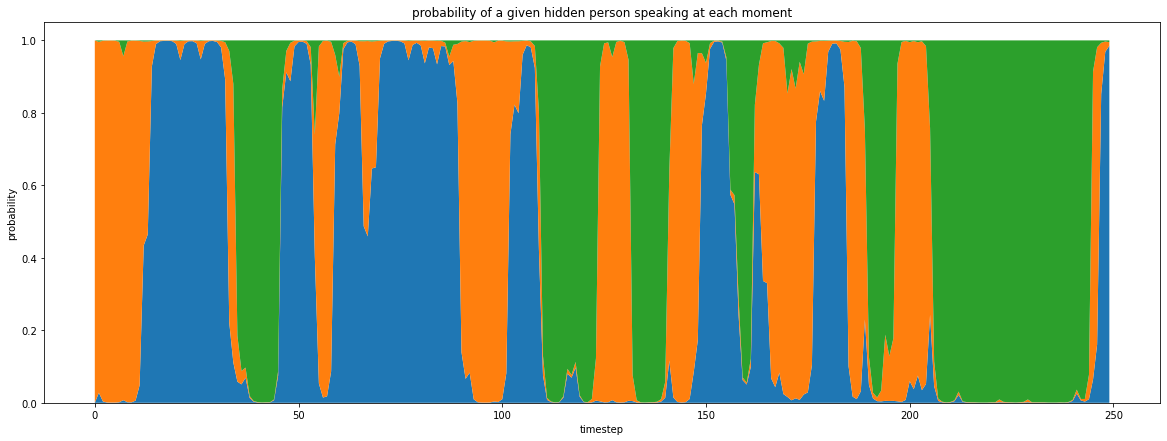

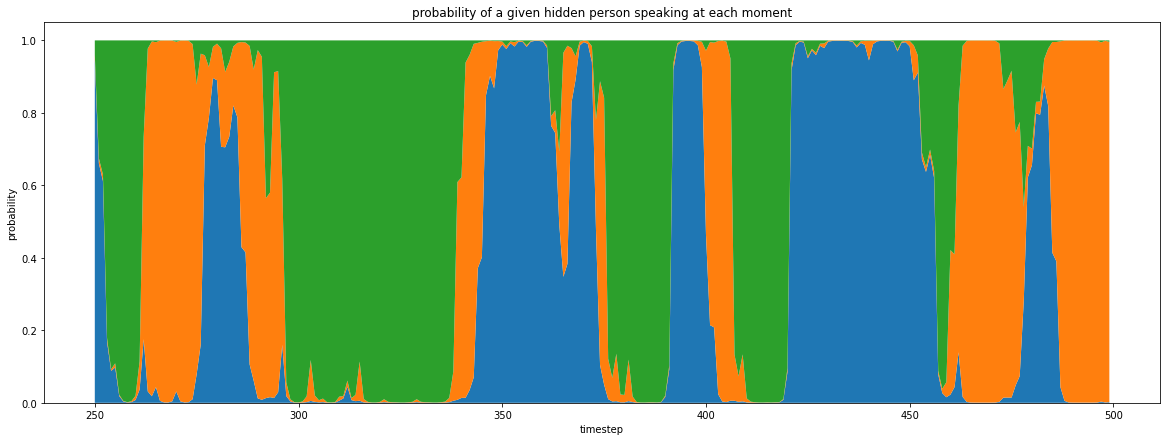

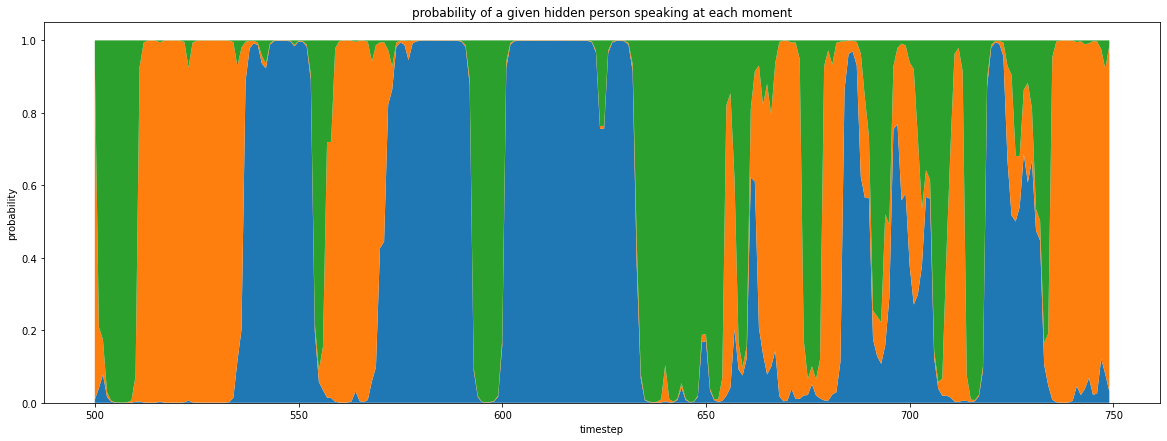

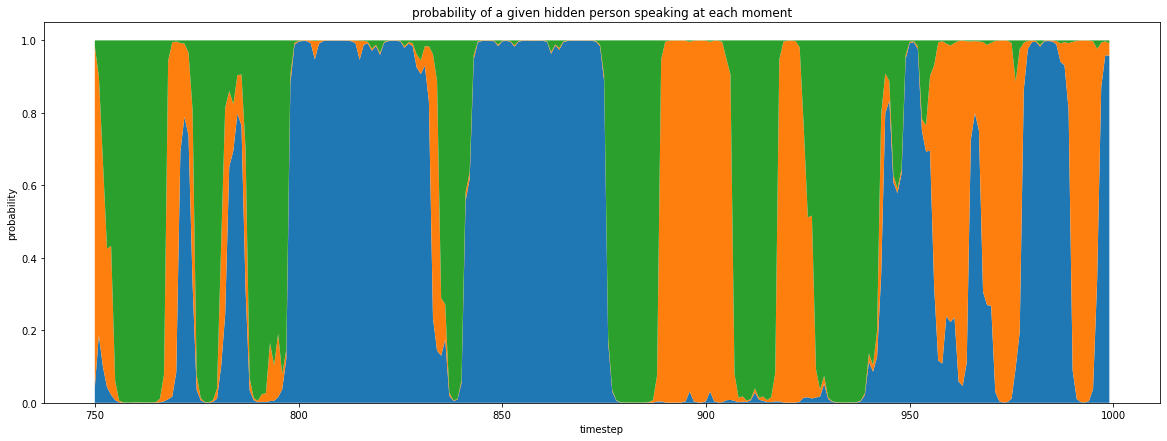

In [70]:
for i in range(0, 800, 250):
  plt.figure(figsize = (20,7))
  limit = i+250
  plt.stackplot(range(i,limit), hmm.predict_proba(encoded.reshape(-1,1))[i:limit,0].T,hmm.predict_proba(encoded.reshape(-1,1))[i:limit,1].T,hmm.predict_proba(encoded.reshape(-1,1))[i:limit,2].T,labels = ['A','B','C'])
  plt.title('probability of a given hidden person speaking at each moment')
  plt.xlabel('timestep')
  plt.ylabel('probability')
  plt.show()